In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
%matplotlib inline
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)

In [4]:
df = pd.read_csv('train.csv')
df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [8]:
df.describe(include='all').T



,count,unique,top,freq,mean,std,min,25%,50%,75%,max
PassengerId,891.0,NaN,NaN,NaN,446.0,257.353842,1.0,223.5,446.0,668.5,891.0
Survived,891.0,NaN,NaN,NaN,0.383838,0.486592,0.0,0.0,0.0,1.0,1.0
Pclass,891.0,NaN,NaN,NaN,2.308642,0.836071,1.0,2.0,3.0,3.0,3.0
Name,891,891,"Braund, Mr. Owen Harris",1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Sex,891,2,male,577,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age,714.0,NaN,NaN,NaN,29.699118,14.526497,0.42,20.125,28.0,38.0,80.0
SibSp,891.0,NaN,NaN,NaN,0.523008,1.102743,0.0,0.0,0.0,1.0,8.0
Parch,891.0,NaN,NaN,NaN,0.381594,0.806057,0.0,0.0,0.0,0.0,6.0
Ticket,891,681,347082,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Fare,891.0,NaN,NaN,NaN,32.204208,49.693429,0.0,7.9104,14.4542,31.0,512.3292


In [10]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [15]:
df.loc[:, 'Age'] = df['Age'].fillna(df['Age'].median())

In [17]:
df.loc[:, 'Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

In [21]:
df['HasCabin'] = df['Cabin'].notnull().astype(int)

In [20]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
HasCabin         0
dtype: int64

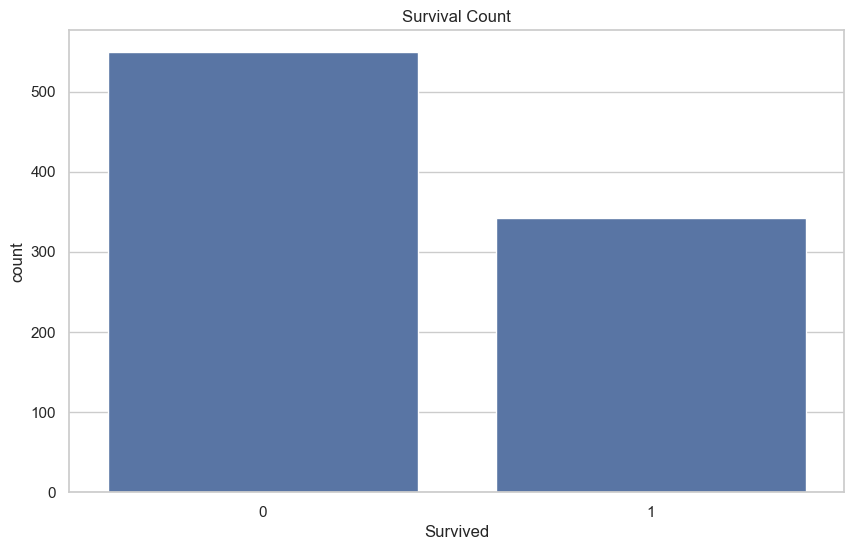

In [22]:
# Survival count
sns.countplot(x='Survived', data=df)
plt.title('Survival Count')
plt.show()

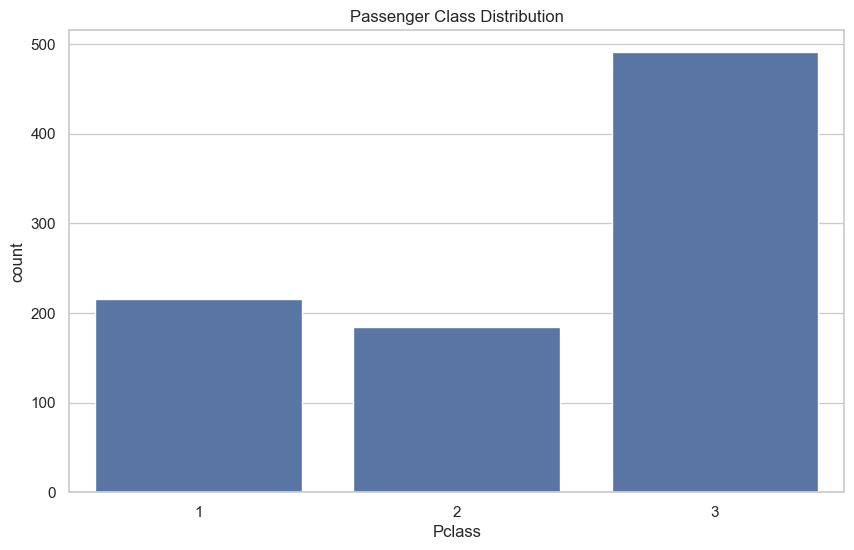

In [23]:
# Pclass distribution
sns.countplot(x='Pclass', data=df)
plt.title('Passenger Class Distribution')
plt.show()

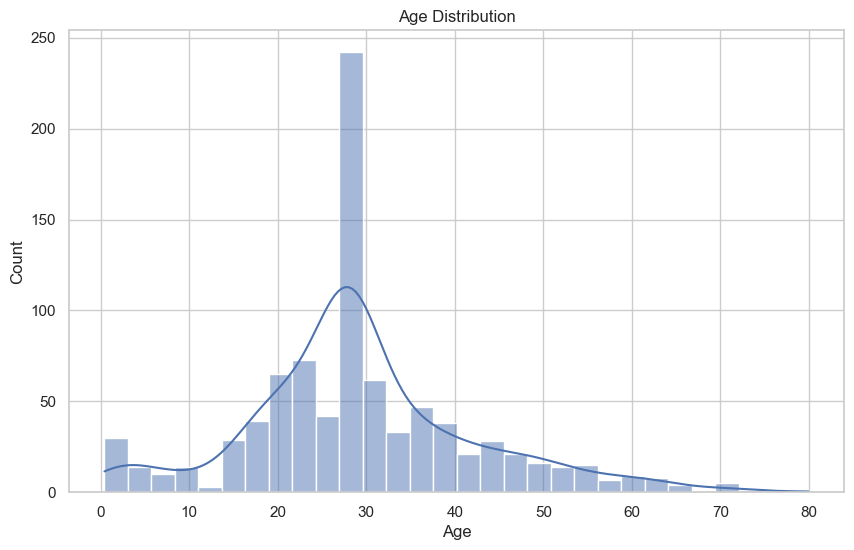

In [24]:
# Age distribution
sns.histplot(df['Age'], bins=30, kde=True)
plt.title('Age Distribution')
plt.show()


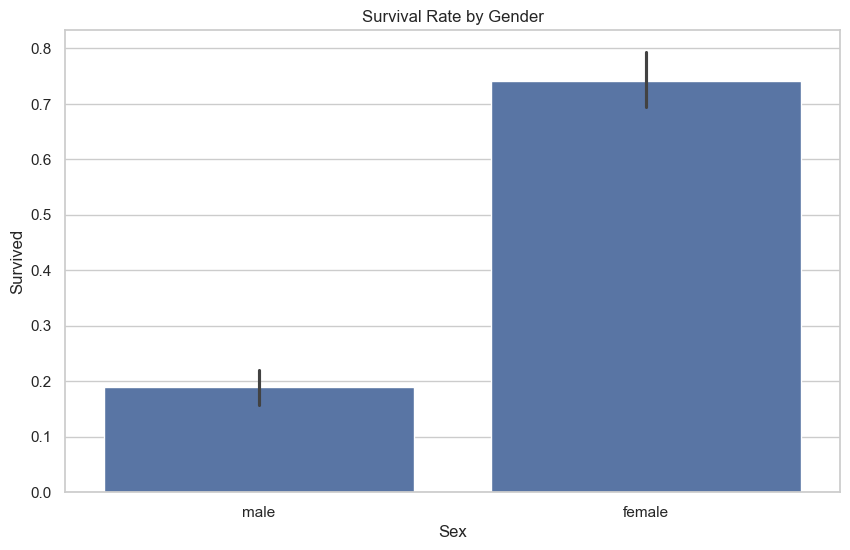

In [25]:
# Survival rate by Sex
sns.barplot(x='Sex', y='Survived', data=df)
plt.title('Survival Rate by Gender')
plt.show()

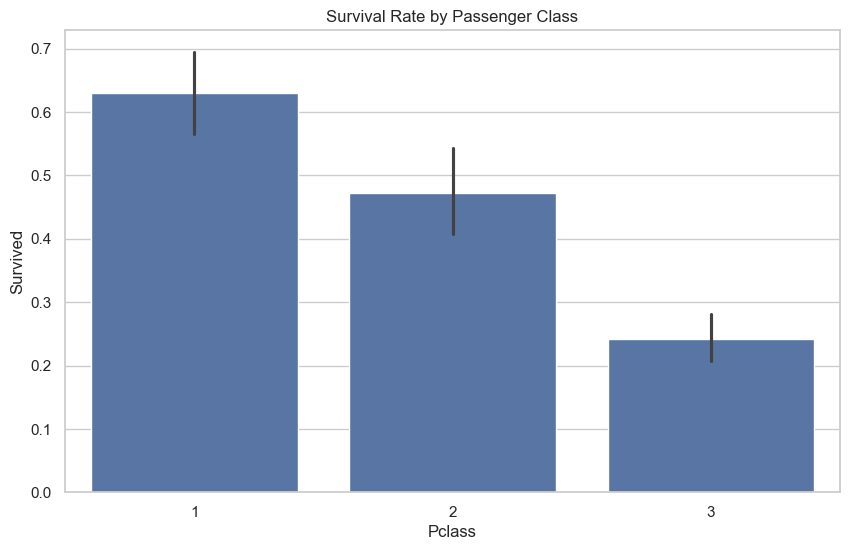

In [26]:
# Survival rate by Pclass
sns.barplot(x='Pclass', y='Survived', data=df)
plt.title('Survival Rate by Passenger Class')
plt.show()

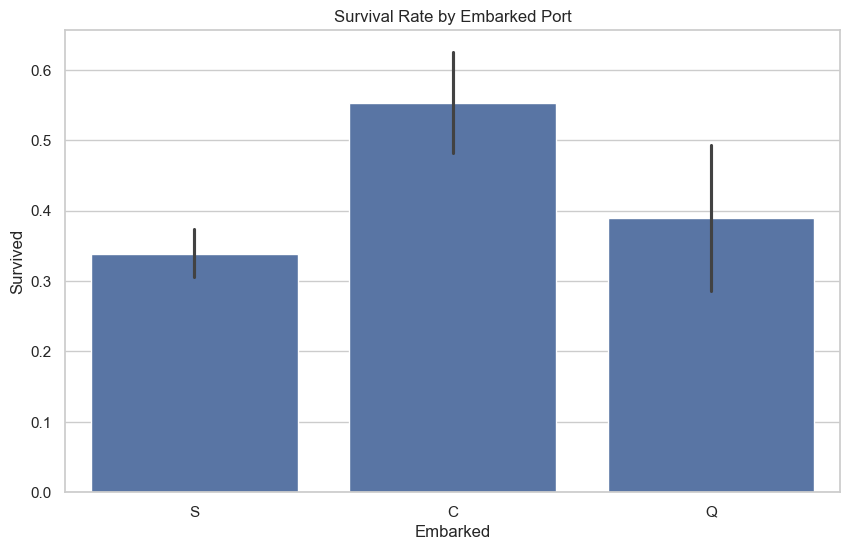

In [27]:
# Survival rate by Embarked
sns.barplot(x='Embarked', y='Survived', data=df)
plt.title('Survival Rate by Embarked Port')
plt.show()

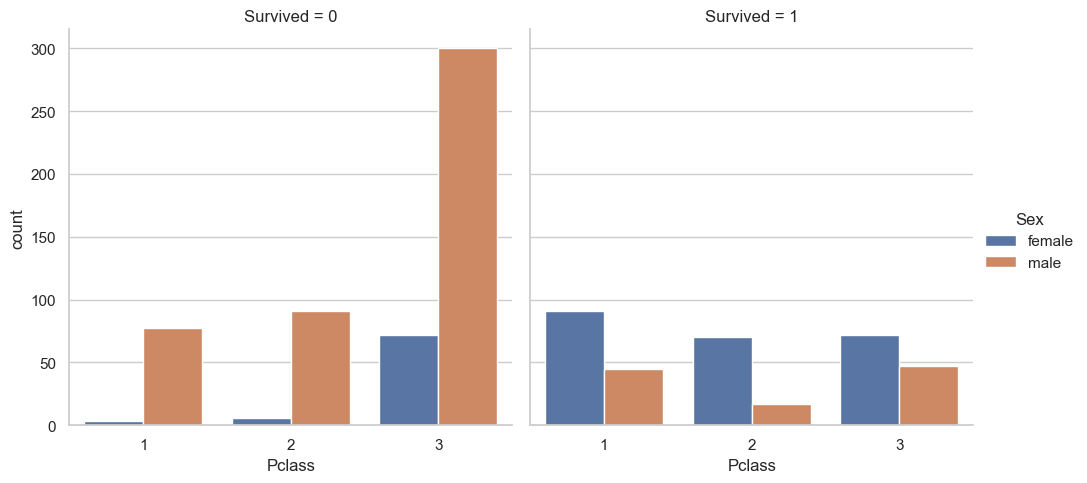

In [28]:
#Multivariate analysis
sns.catplot(x='Pclass', hue='Sex', col='Survived', data=df, kind='count')
plt.show()


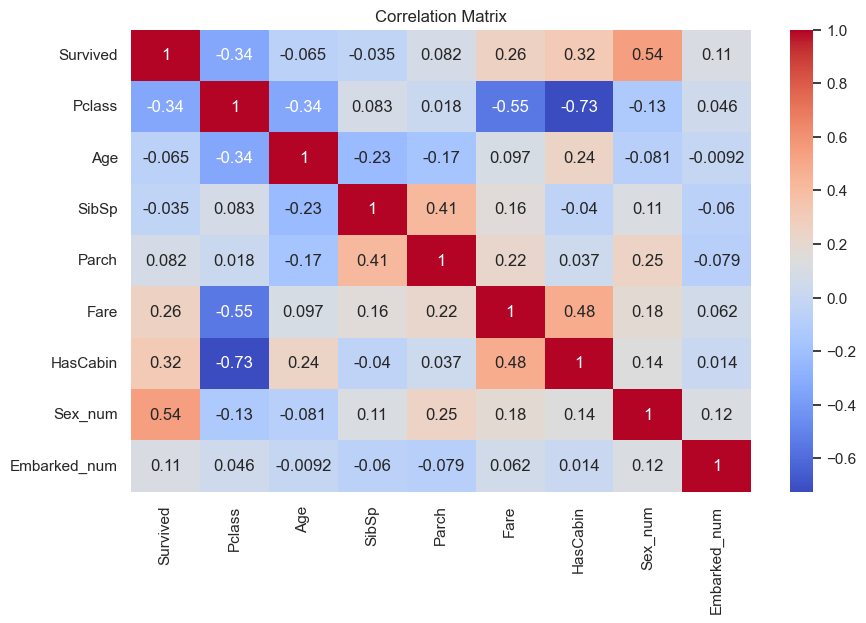

In [29]:
# Convert categorical to numeric
df['Sex_num'] = df['Sex'].map({'male':0, 'female':1})
df['Embarked_num'] = df['Embarked'].map({'S':0, 'C':1, 'Q':2})

corr = df[['Survived','Pclass','Age','SibSp','Parch','Fare','HasCabin','Sex_num','Embarked_num']].corr()

sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


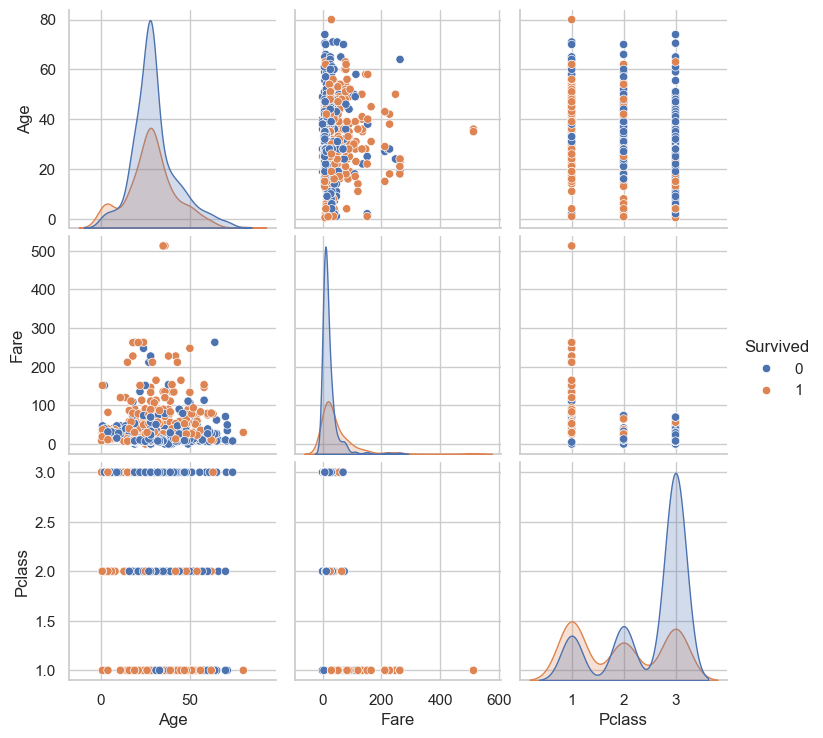

In [33]:
#Pairplot
sns.pairplot(df[['Survived','Age','Fare','Pclass']], hue='Survived')
plt.show()


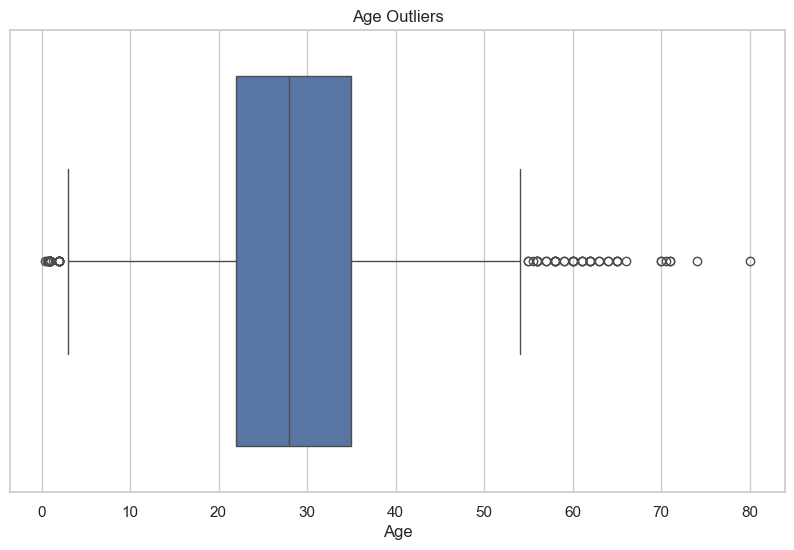

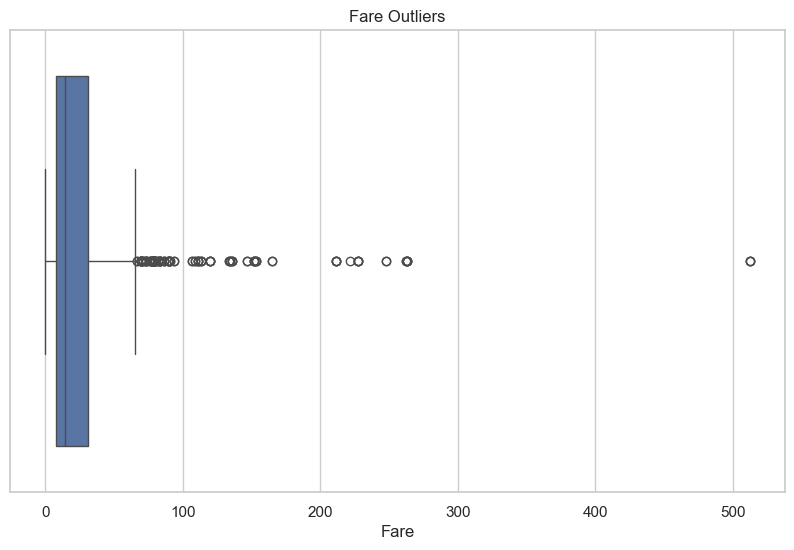

In [34]:
#Outlier detection (Age & Fare)
sns.boxplot(x=df['Age'])
plt.title('Age Outliers')
plt.show()

sns.boxplot(x=df['Fare'])
plt.title('Fare Outliers')
plt.show()
